# India Air Quality - Exploratory Data Analysis

In this notebook we are going to develop a simple exploratory data analysis (EDA). We will use a clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).

**1. LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer #mpute NaN values which exist

%matplotlib inline


In [5]:
sns.set(style="ticks", rc = {'figure.figsize':(20,15)})

In [16]:
import warnings
warnings.filterwarnings('ignore')

**2. THE DATA**




In [3]:
airquality = pd.read_csv('C:/Users/NITROPC/Desktop/DATA SCIENCE/PROYECTOS/01_ANALISIS EXPLORATORIO/INDIA AIR QUALITY/data.csv',
                        encoding = "ISO-8859-1", parse_dates=['date'], low_memory=False)

In [4]:
airquality.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


The dataset consists of the following columns:

- stn_code: Station Code
- sampling_date: Date of sampling (note how this is formatted)
- state: State
- location: Location of recording
- agency: Agency
- type: Type of area
- so2: Sulphur dioxide (µg/m3)
- no2: Nitrogen dioxide (µg/m3)
- rspm: Respirable Suspended Particulate Matter (µg/m3)
- spm: Suspended Particulate Matter (µg/m3)
- location_monitoring_station: Unknown
- pm2_5: PSI 2.5 (µg/m3)
- date: Date of sampling

**3. CHECKING THE DATASET**

Let´s take a look to the NaNs in the dataset. To proceed with EDA we need to handle these NaNs by removing them or filling them.

In [12]:
print('Dataset shape:\n', airquality.shape)

print('Dataset columns:\n', airquality.info())

print("NaNs:\n", airquality.isnull().sum())



Dataset shape:
 (435742, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm                         395520 non-null  float64       
 9   spm                          198355 non-null  float64       
 10  location_monitoring_station  408251 non-null  object        
 1

Looking at the dataset head, we can conclude that the following columns:

- stn_code
- agency
- sampling_date
- location_monitoring_agency

do not add much to the dataset in terms of information that can't already be extracted from other columns. Therefore, we can drop these columns.

Since date also has missing values, we will drop the rows containing these values as they're of little use as well.

Cleaning values
Since the geographical nomenclature has changed over time, we change it here as well to correspond to more accurate insights.

The type column
Currently, the type column has several names for the same type and therefore, it is better to clean it up and make it more uniform

**4. CLEANING THE DATA**

In [13]:
aqc = airquality.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis = 1)#dropping columns that aren't required

In [14]:
aqc = aqc.dropna(subset = ['date'])# dropping rows where no date is available


In [17]:
# cleaning up name changes

aqc.state = aqc.state.replace({'Uttaranchal':'Uttarakhand'})
aqc.state[aqc.location == "Jamshedpur"] = aqc.state[aqc.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

In [19]:
#changing types to uniform format

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
aqc.type = aqc.type.replace(types)

In [21]:
aqc.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [22]:
# defining columns of importance, which shall be used reguarly
value_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

Now, let´s fill the NaNs values. We will use SimpleImputer to fill the missing values in every column with the **mean**.

In [23]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
aqc[value_cols] = imputer.fit_transform(aqc[value_cols])

In [25]:
# checking to see if the dataset has any null values left over and the format
print(aqc.isnull().sum())
aqc.tail()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64


,state,location,type,so2,no2,rspm,spm,pm2_5,date
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,220.78348,40.791467,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,220.78348,40.791467,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,220.78348,40.791467,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,220.78348,40.791467,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,220.78348,40.791467,2015-12-29


**5. EXPLORATORY DATA ANALYSIS**

_5.1. PLOTTING POLLUTANT LEVELS_

In [30]:
# defining a function that plots SO2, NO2, RSPM and SPM yearly average levels for a given state
# since data is available monthly, it was resampled to a year and averaged to obtain yearly averages

def plot_for_state(state):
    fig, ax = plt.subplots(2, 2, figsize = (20,12))
    fig.suptitle(state, size = 20)
    state = aqc[aqc.state == state]
    state = state.reset_index().set_index('date')[value_cols].resample('Y').mean()
   
    state.so2.plot(legend = True, ax = ax[0][0], title = 'SO2')
    ax[0][0].set_ylabel("SO2 (µg/m3)")
    ax[0][0].set_xlabel("Year")
    
    state.no2.plot(legend=True, ax=ax[0][1], title="NO2")
    ax[0][1].set_ylabel("NO2 (µg/m3)")
    ax[0][1].set_xlabel("Year")
    
    state.rspm.plot(legend=True, ax=ax[1][0], title="RSPM")
    ax[1][0].set_ylabel("RSPM (PM10 µg/m3)")
    ax[1][0].set_xlabel("Year")
    
    state.spm.plot(legend=True, ax=ax[1][1], title="SPM")
    ax[1][1].set_ylabel("SPM (PM10 µg/m3)")
    ax[1][1].set_xlabel("Year")
    

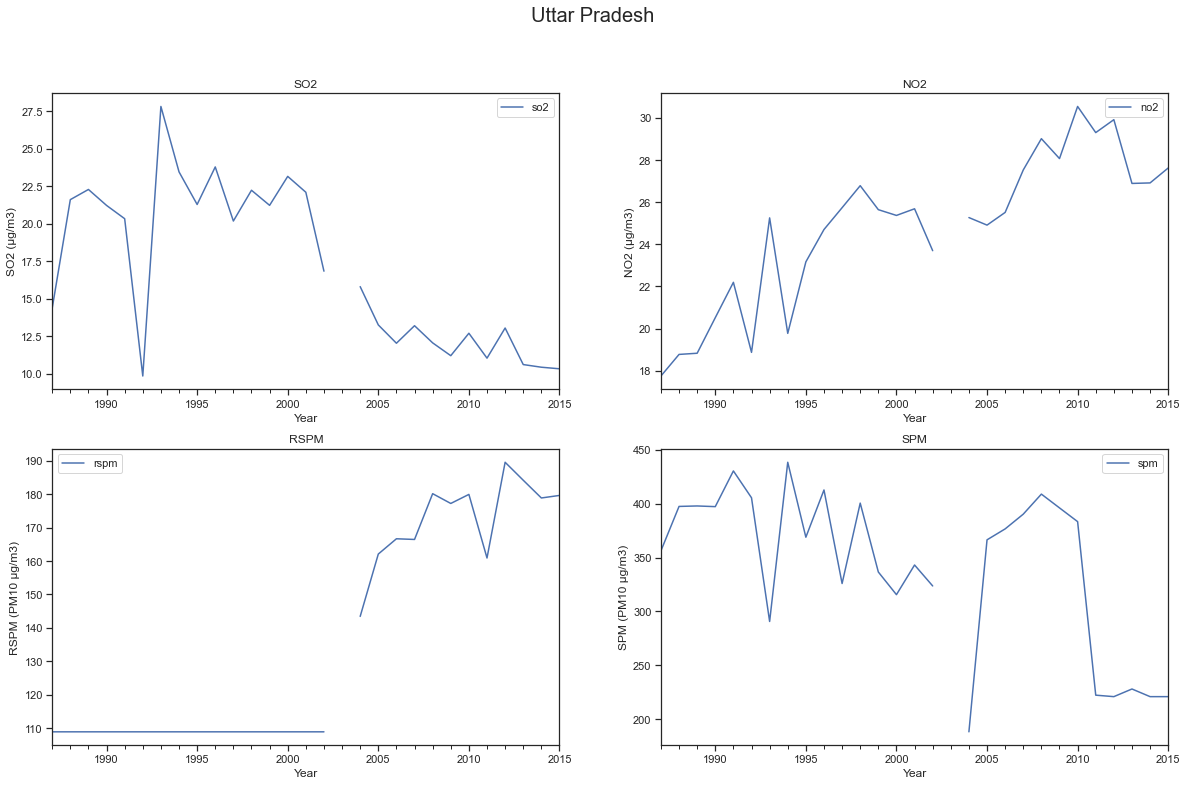

In [31]:
plot_for_state('Uttar Pradesh')

_5.2. PLOTTING HIGHEST AND LOWEST STATES_

In [34]:
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2)

def top_bottom_10states(indicator = 'so2'):
    fig, ax = plt.subplots(2,1, figsize = (20, 12))
    ind = aqc[[indicator, 'state']].groupby('state', as_index = False).median().sort_values(by = indicator, ascending = False)
    
    top10 = sns.barplot(x = 'state', y = indicator, data = ind[:10], ax = ax[0], color = 'r')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='g')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State")
    

    
    
    

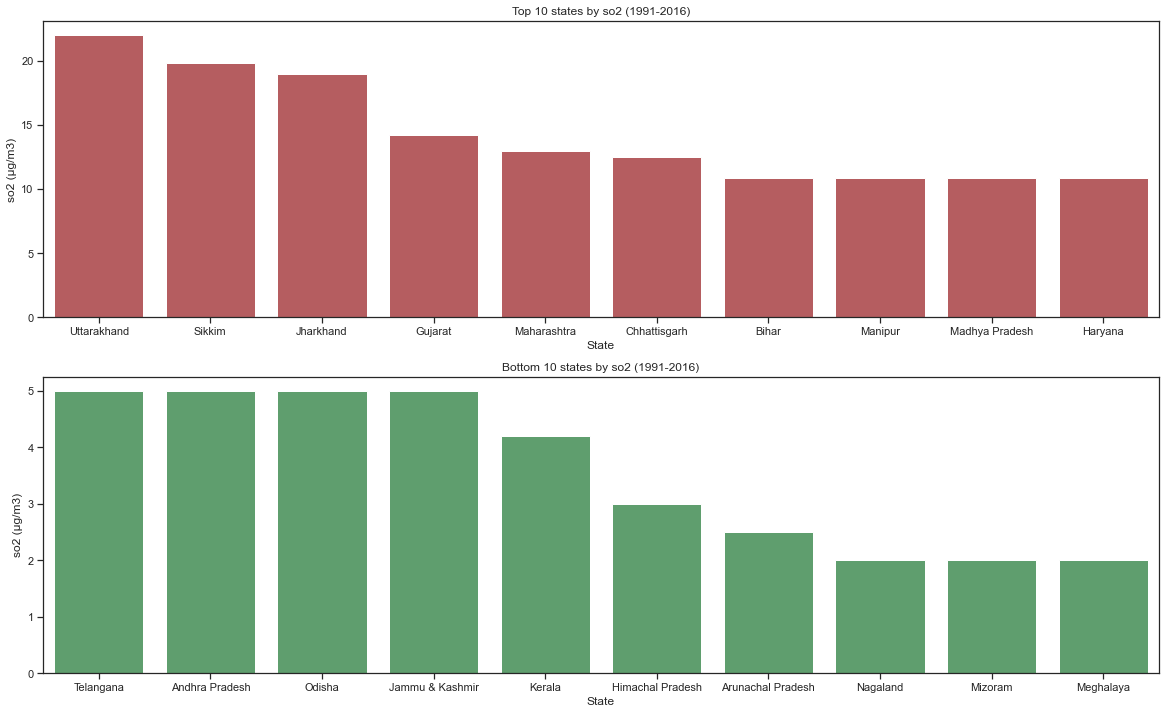

In [35]:
top_bottom_10states('so2')

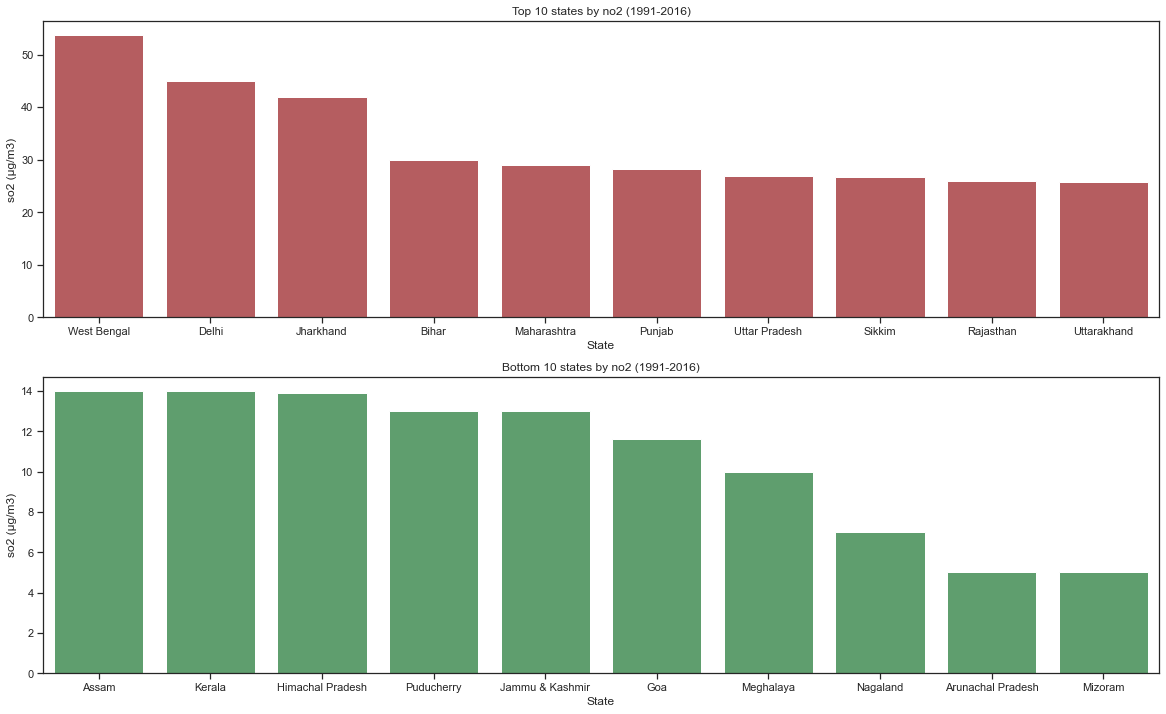

In [36]:
top_bottom_10states('no2')

_5.3. PLOTTING YEARLY TRENDS_

In [41]:
# defining a function to plot the yearly trend values for a given indicator (defaults to SO2) and state (defaults to overall)
def yearly_trend(state="", indicator="so2", ):
    plt.figure(figsize=(20,12))
    aqc['year'] = aqc.date.dt.year
    if state is "":
        year_wise = aqc[[indicator, 'year', 'state']].groupby('year', as_index=False).median()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {}'.format(indicator))
    else:
        year_wise = aqc[[indicator, 'year', 'state']].groupby(['state','year']).median().loc[state].reset_index()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {} for {}'.format(indicator, state))

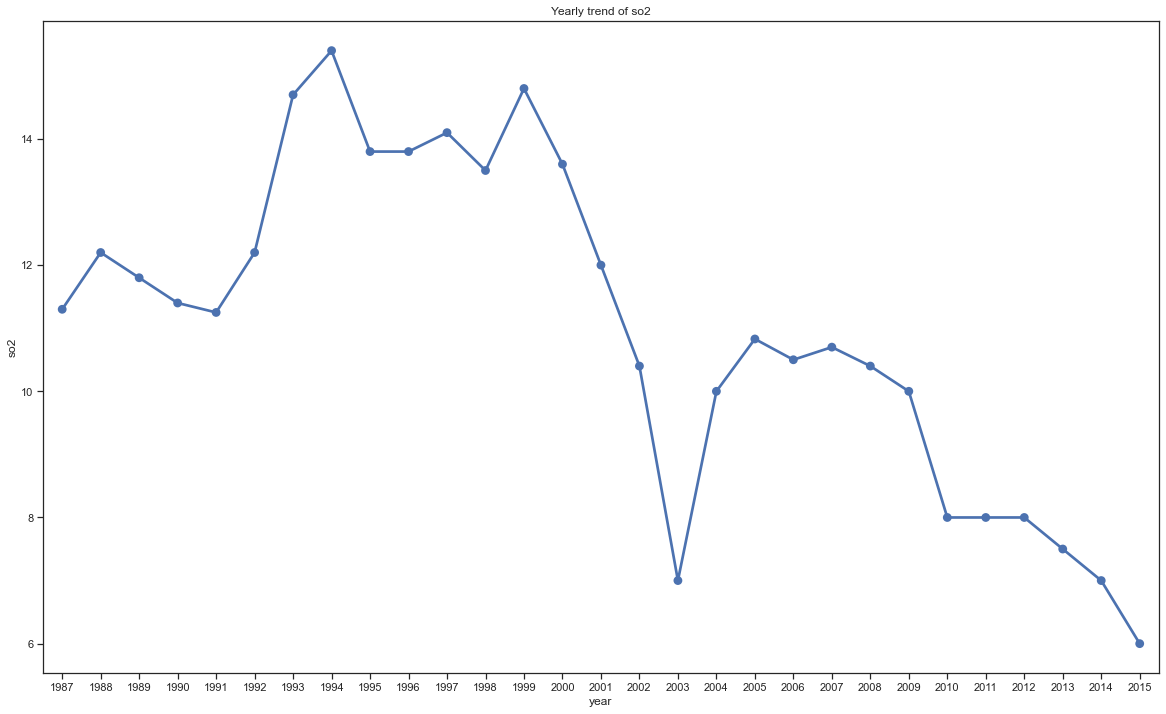

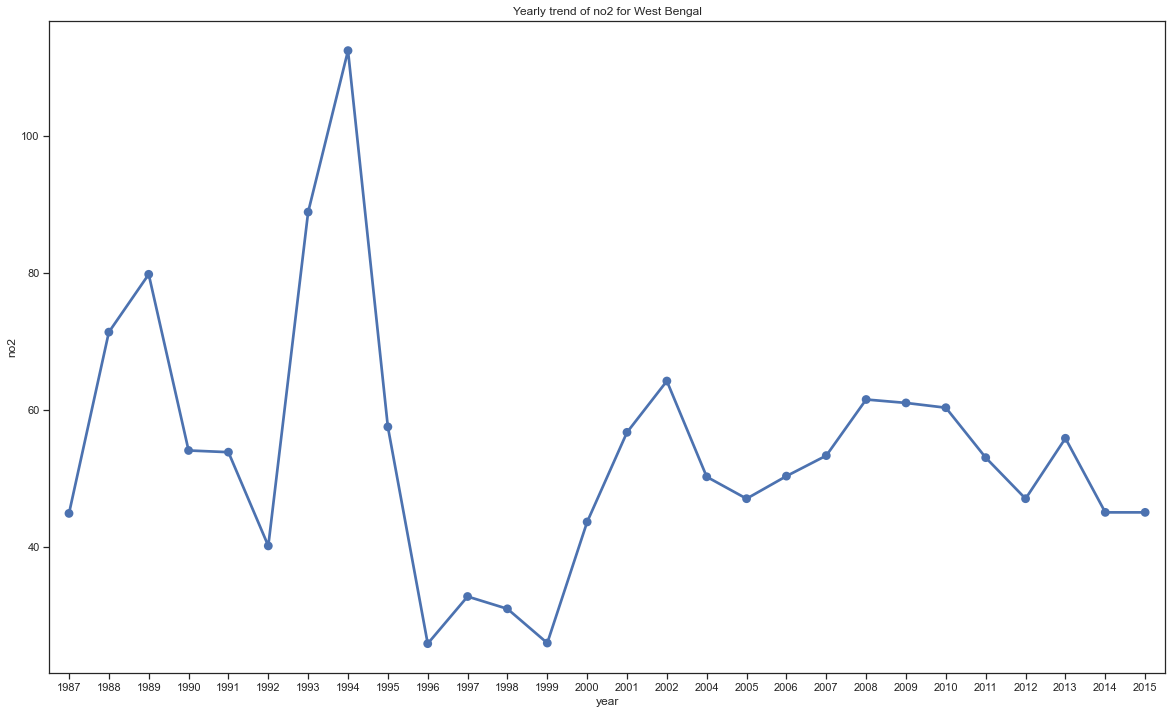

In [42]:
yearly_trend()
yearly_trend("West Bengal", "no2")

_5.4. PLOTTING A HEATMAP_

In [43]:
# defining a function to plot a heatmap for yearly median average for a given indicator (defaults to SO2)
def indicator_by_state_and_year(indicator="so2"):
    plt.figure(figsize=(20, 20))
    hmap = sns.heatmap(
        data=aqc.pivot_table(values=indicator, index='state', columns='year', aggfunc='median', margins=True),
               annot=True, linewidths=.5, cbar=True, square=True, cmap='inferno', cbar_kws={'label': "Annual Average"})
    
    hmap.set_title("{} by state and year".format(indicator))

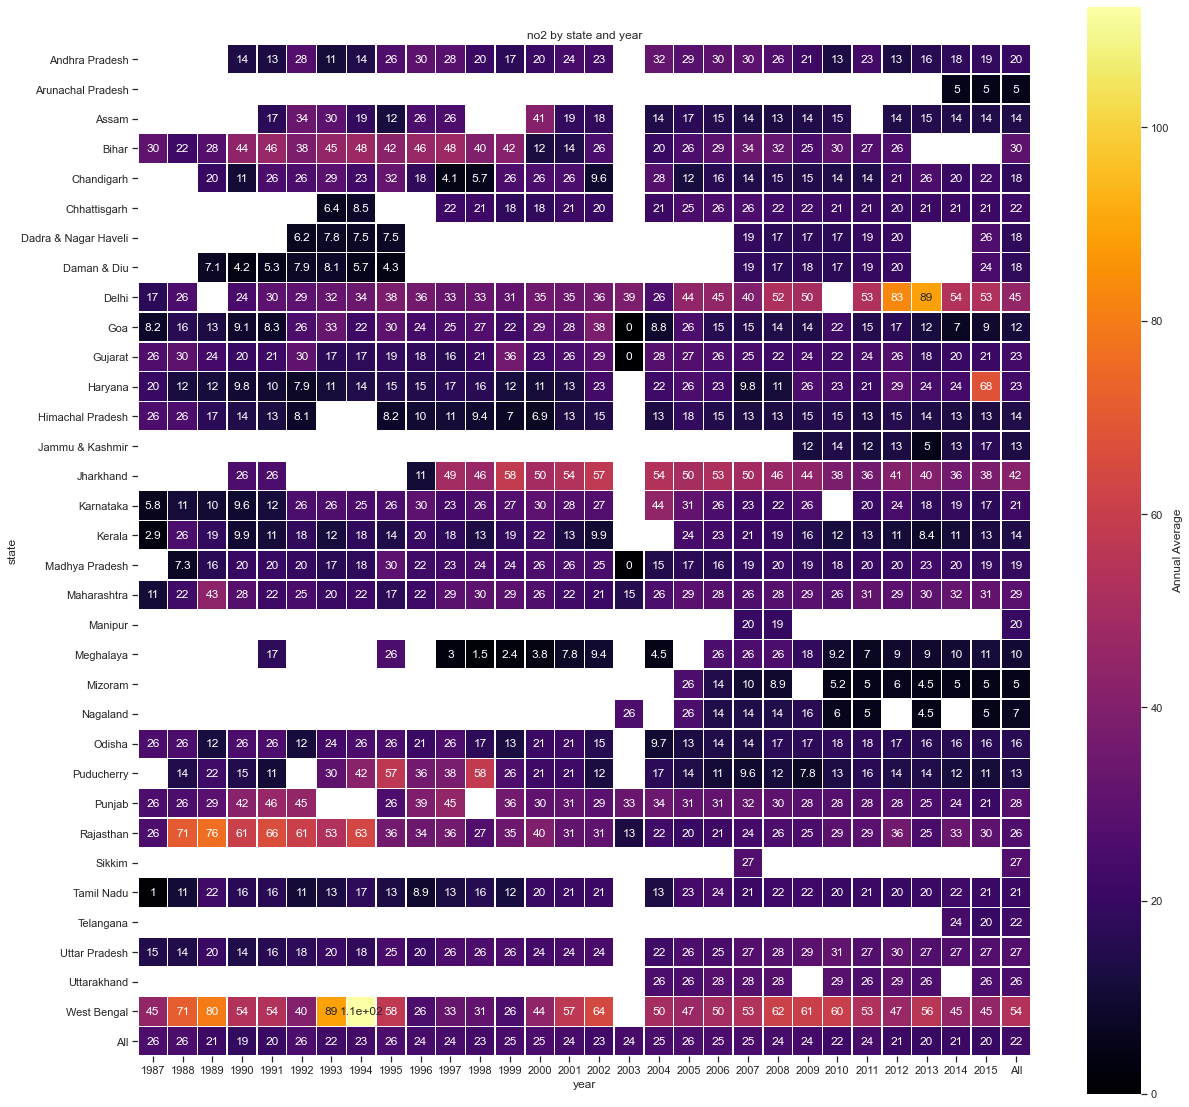

In [44]:
indicator_by_state_and_year('no2')

_5.5. PLOTTING THE RELATIONSHIP BETWEEN TWO INDICATORS_

In [45]:
# defining a function to plot the relationship between two indicators on yearly averages.
def relation(ind1="so2", ind2="no2"):
    relation = sns.jointplot(x=ind1, y=ind2, data=aqc.set_index('date').resample('Y').mean(), kind='reg')

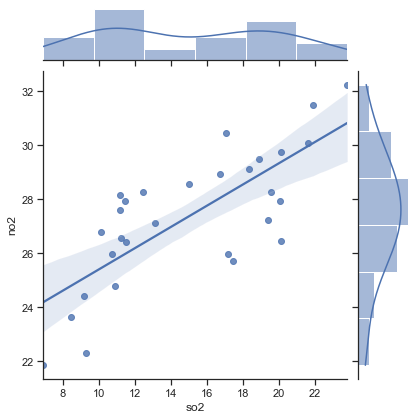

In [46]:
relation()

**6. FUTURE EXPLORATION**

We can do more exploration:
- Seasonal variations.
- Pollutant averages by locations.
- Pollutant averages by type.